In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/laxpa/OneDrive/Desktop/sydney_rain prediction.csv', header=0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


### Missing Value Imputation

# Replace Null value with Mean value

In [5]:
#Dummy Variable 
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], dtype= int, drop_first = True)

In [6]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace null values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill null values in "RainToday" with the mode
df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)

C:\Users\laxpa\AppData\Local\Temp\ipykernel_17260\1513685288.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3337 non-null   float64
 3   MaxTemp           3337 non-null   float64
 4   Rainfall          3337 non-null   float64
 5   Evaporation       3337 non-null   float64
 6   Sunshine          3337 non-null   float64
 7   Humidity9am       3337 non-null   float64
 8   Humidity3pm       3337 non-null   float64
 9   Pressure9am       3337 non-null   float64
 10  Pressure3pm       3337 non-null   float64
 11  Cloud9am          3337 non-null   float64
 12  Cloud3pm          3337 non-null   float64
 13  Temp9am           3337 non-null   float64
 14  Temp3pm           3337 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


# Outliers detection and Treatment

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

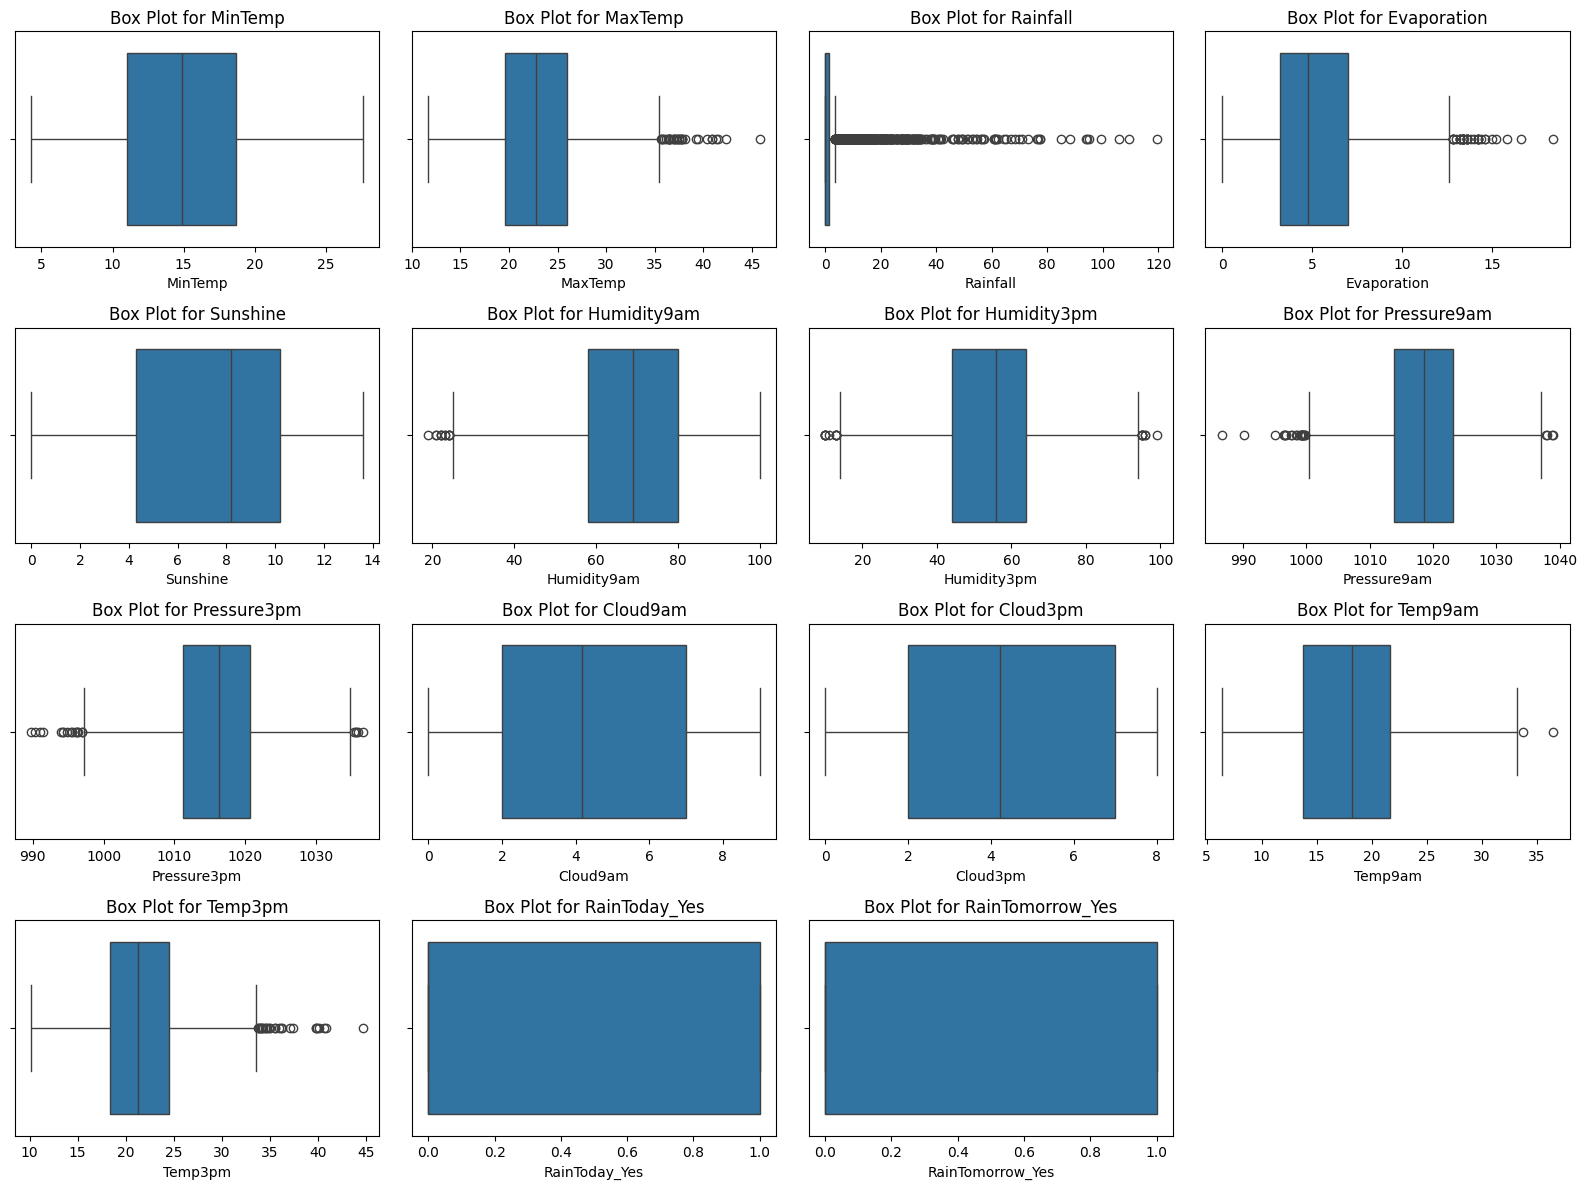

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

# Outliers Treatment

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3337 non-null   float64
 3   MaxTemp           3337 non-null   float64
 4   Rainfall          3337 non-null   float64
 5   Evaporation       3337 non-null   float64
 6   Sunshine          3337 non-null   float64
 7   Humidity9am       3337 non-null   float64
 8   Humidity3pm       3337 non-null   float64
 9   Pressure9am       3337 non-null   float64
 10  Pressure3pm       3337 non-null   float64
 11  Cloud9am          3337 non-null   float64
 12  Cloud3pm          3337 non-null   float64
 13  Temp9am           3337 non-null   float64
 14  Temp3pm           3337 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


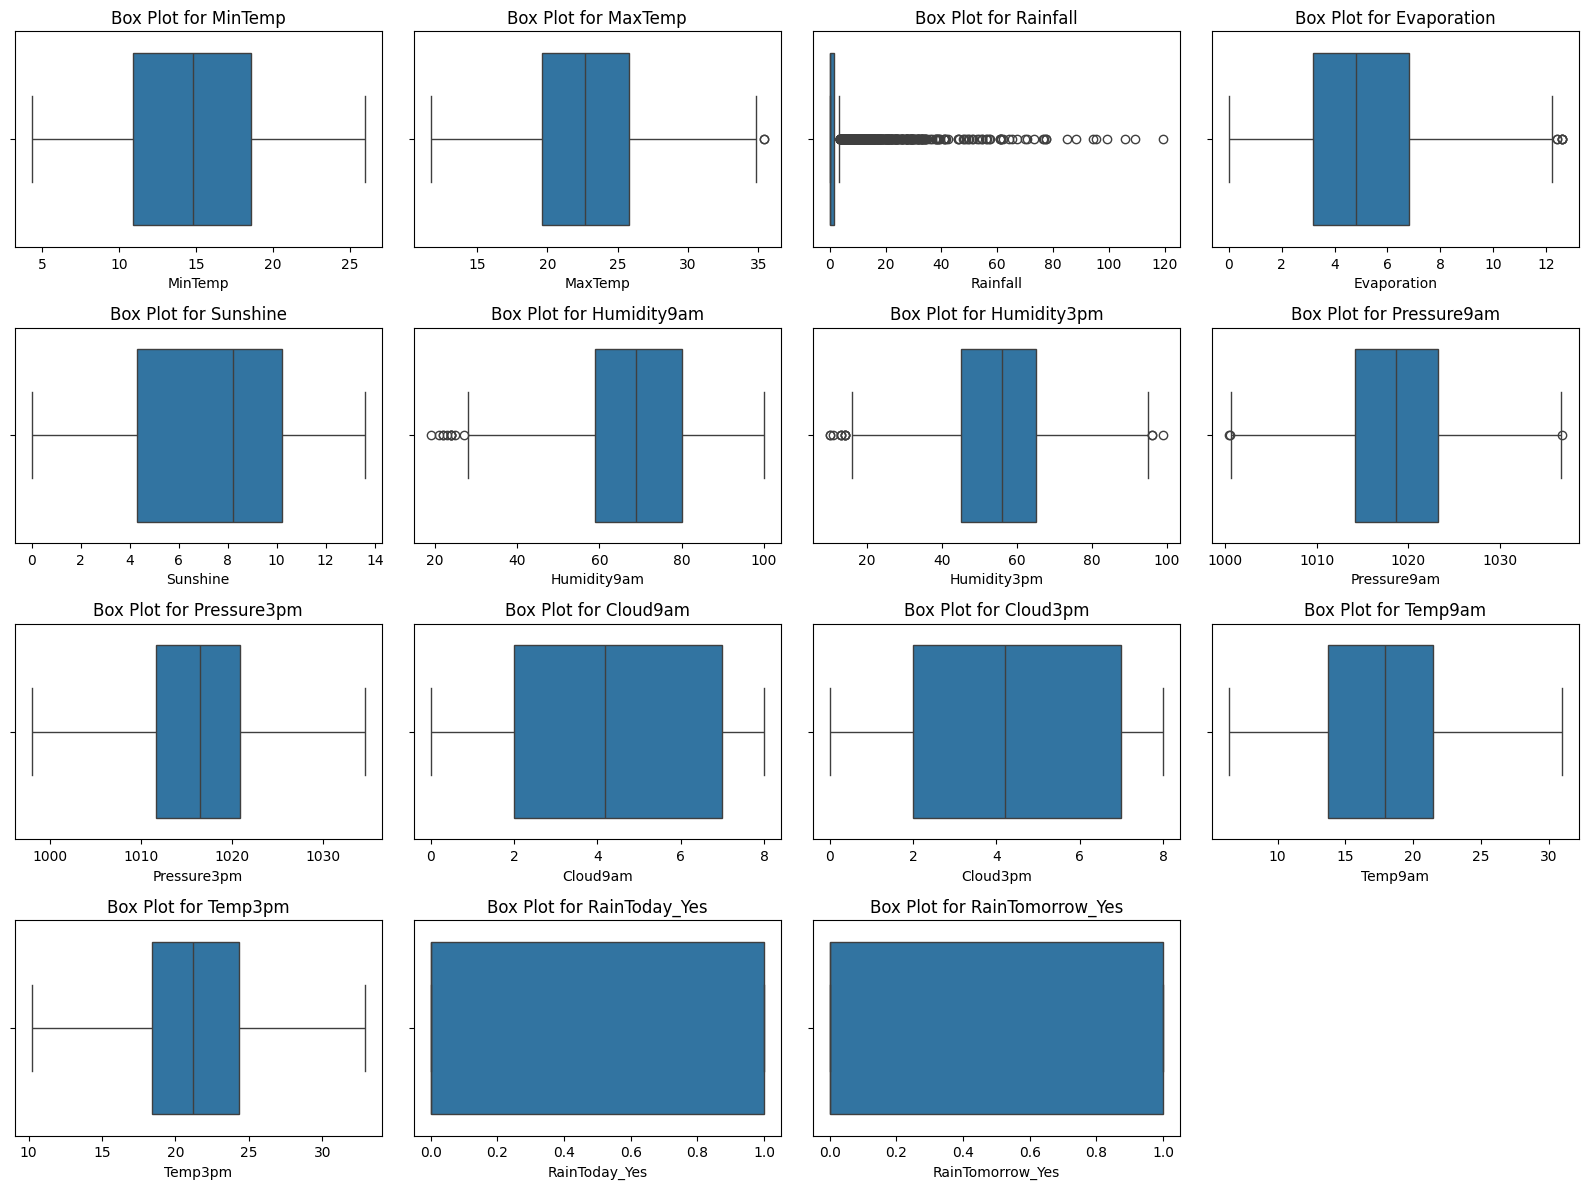

In [11]:
# Handle outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df = remove_outliers(df, 'MaxTemp')
df = remove_outliers(df, 'Evaporation')
df = remove_outliers(df, 'Pressure9am')
df = remove_outliers(df, 'Pressure3pm')
df = remove_outliers(df, 'Temp3pm')



plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

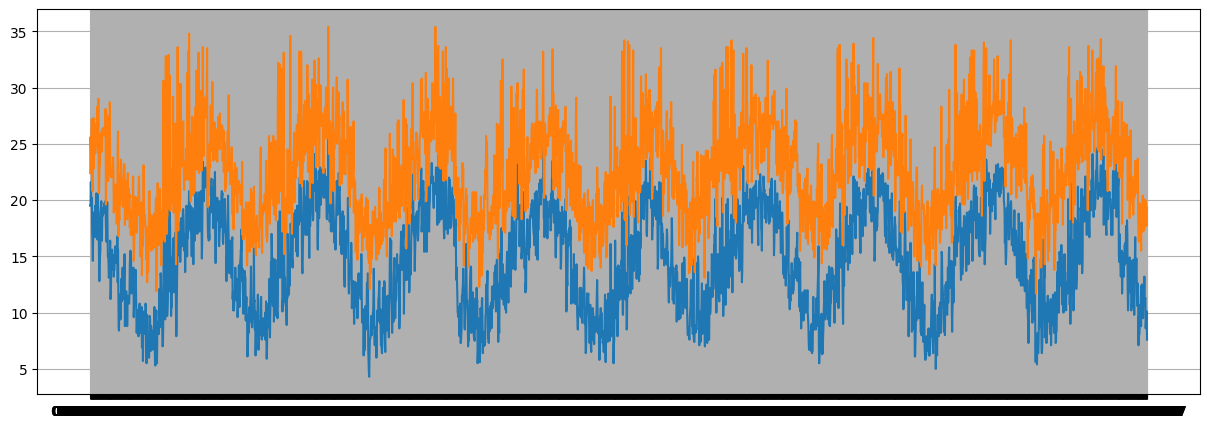

In [12]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Date'], df[['MinTemp', 'MaxTemp']])
plt.grid();

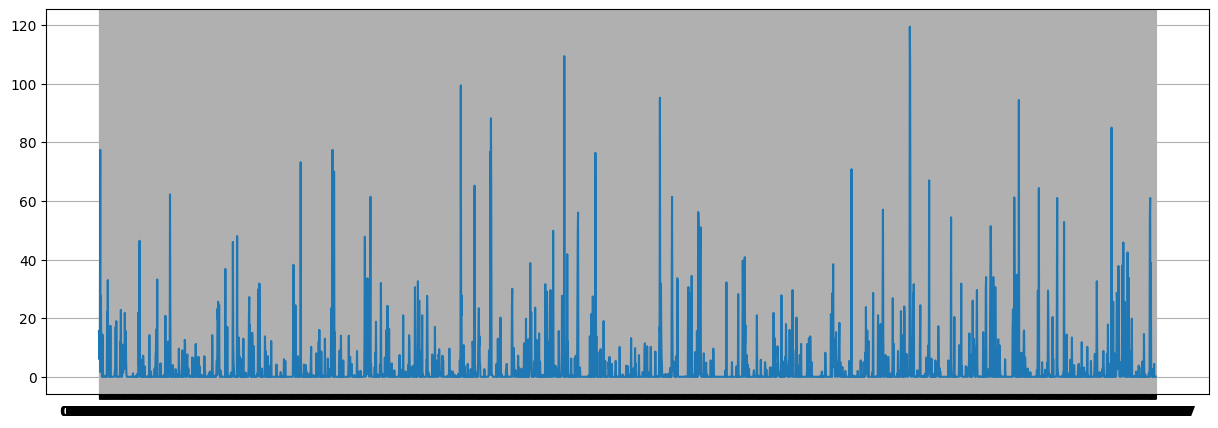

In [13]:
plt.figure(figsize = (15,5))
fig = plt.plot(df['Date'], df[['Rainfall']])
plt.grid();

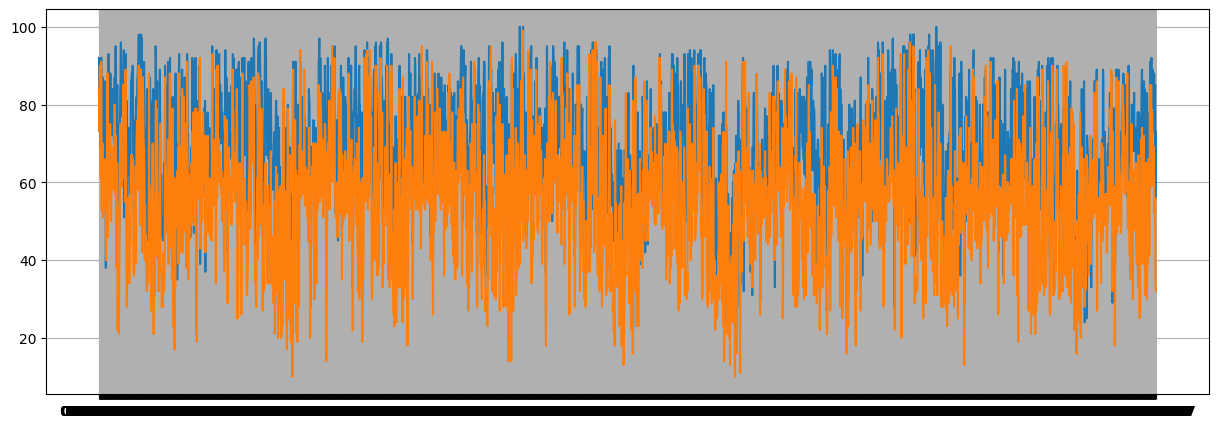

In [14]:
plt.figure(figsize = (15,5))
fig = plt.plot(df['Date'], df[['Humidity9am', 'Humidity3pm']])
plt.grid();

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3228 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3228 non-null   object 
 1   Location          3228 non-null   object 
 2   MinTemp           3228 non-null   float64
 3   MaxTemp           3228 non-null   float64
 4   Rainfall          3228 non-null   float64
 5   Evaporation       3228 non-null   float64
 6   Sunshine          3228 non-null   float64
 7   Humidity9am       3228 non-null   float64
 8   Humidity3pm       3228 non-null   float64
 9   Pressure9am       3228 non-null   float64
 10  Pressure3pm       3228 non-null   float64
 11  Cloud9am          3228 non-null   float64
 12  Cloud3pm          3228 non-null   float64
 13  Temp9am           3228 non-null   float64
 14  Temp3pm           3228 non-null   float64
 15  RainToday_Yes     3228 non-null   int32  
 16  RainTomorrow_Yes  3228 non-null   int32  
dtype

## Train-Test Split 

In [16]:
X_multi = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1)
y_multi = df['RainTomorrow_Yes']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [17]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
2398,19.1,26.8,0.0,8.0,8.4,64.0,63.0,1014.2,1011.2,2.0,4.0,23.8,24.6,0
2286,6.5,22.4,0.0,2.6,10.1,64.0,43.0,1032.6,1026.2,1.0,1.0,9.7,20.1,0
3284,11.8,20.0,3.8,3.8,3.3,78.0,45.0,1031.6,1029.4,6.0,7.0,14.7,19.5,1
382,19.4,22.9,3.8,7.4,0.0,70.0,71.0,1017.0,1015.4,8.0,8.0,20.8,22.0,1
2336,14.3,21.7,2.0,3.0,8.3,59.0,51.0,1017.9,1015.9,5.0,5.0,18.8,20.1,1


In [18]:
X_train.shape

(2582, 14)

In [19]:
X_test.shape

(646, 14)

### Training Classification Tree

In [20]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [21]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Predict values using trained model

In [22]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [23]:
y_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

### Model Performance

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
confusion_matrix(y_train, y_train_pred)

array([[1735,  170],
       [ 279,  398]], dtype=int64)

In [26]:
confusion_matrix(y_test, y_test_pred)

array([[417,  65],
       [ 62, 102]], dtype=int64)

In [27]:
accuracy_score(y_test, y_test_pred)

0.8034055727554179

### Plotting decision tree

In [28]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [29]:
from IPython.display import Image

In [30]:
import pydotplus

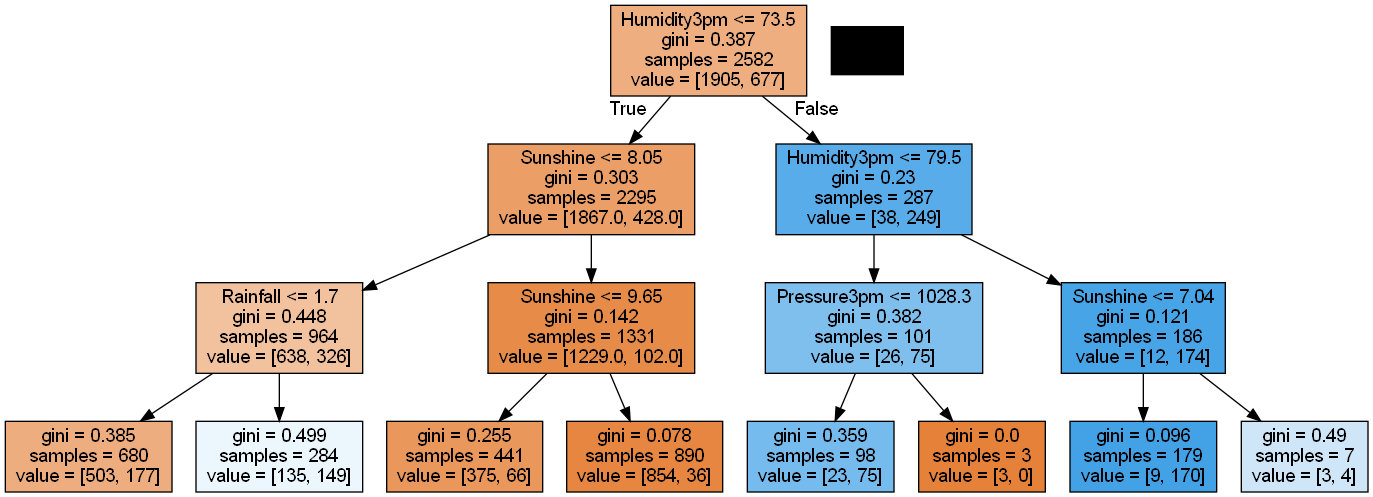

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree growth

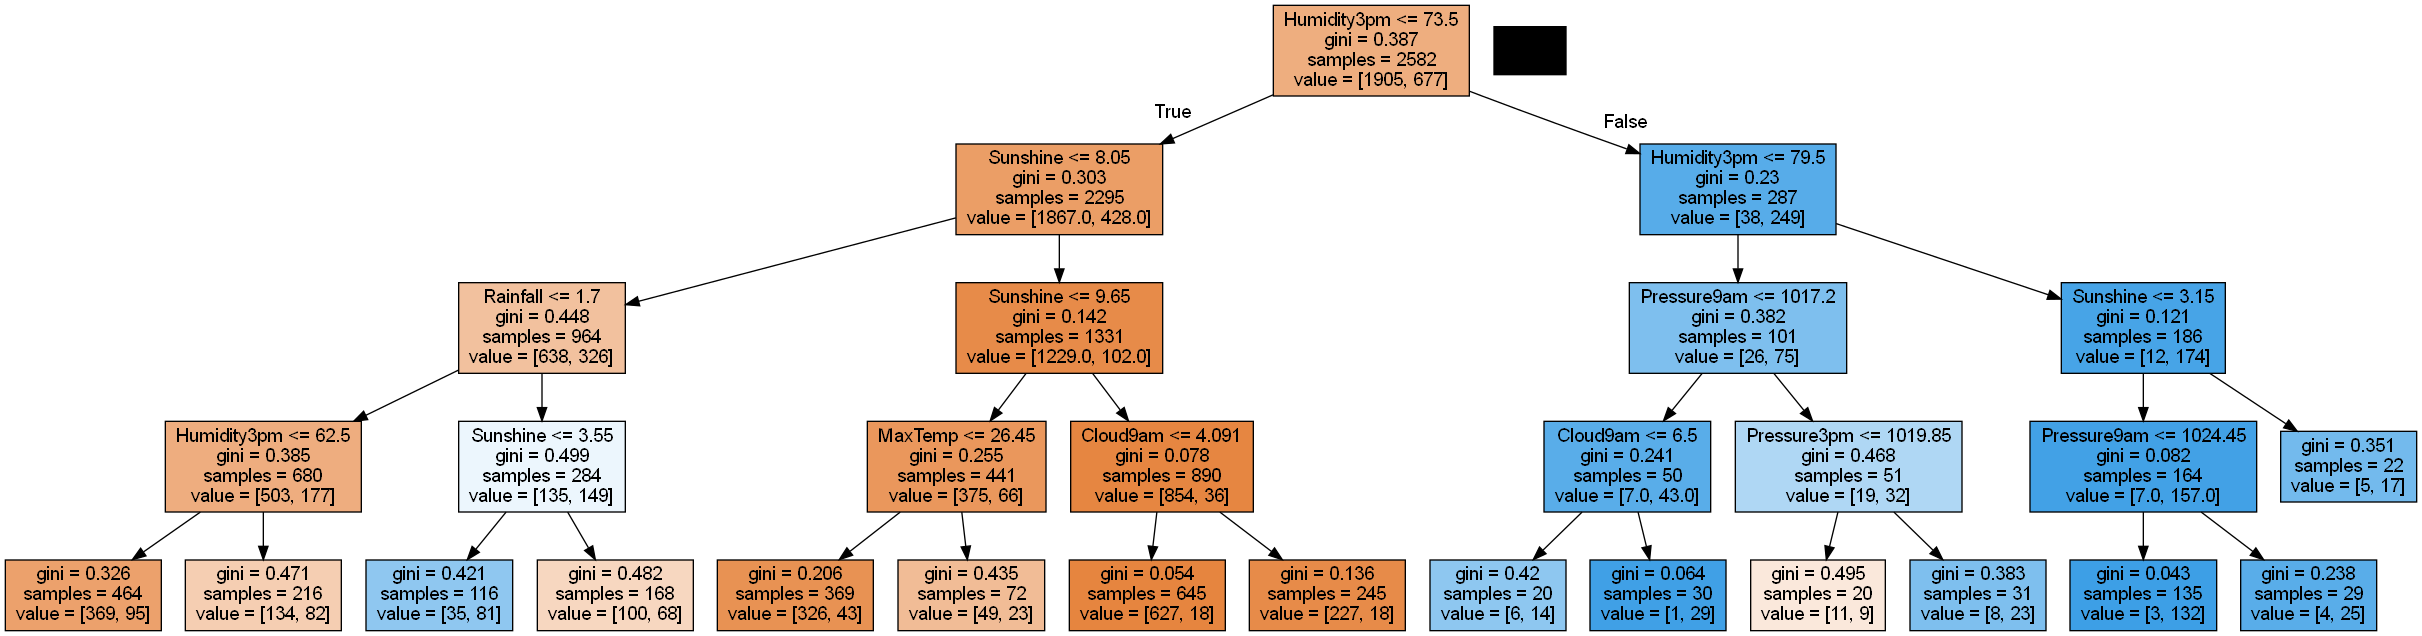

In [32]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [33]:
accuracy_score(y_test, clftree2.predict(X_test))

0.8390092879256966

### Bagging

In [34]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [35]:
from sklearn.ensemble import BaggingClassifier

In [36]:
bag_clf = BaggingClassifier(estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [37]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [38]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[443,  39],
       [ 71,  93]], dtype=int64)

In [39]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.8297213622291022

### Random Forest


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [42]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [43]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[439,  43],
       [ 72,  92]], dtype=int64)

In [44]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.8219814241486069

### Grid Search


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [47]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [48]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [50]:
grid_search.best_params_ 

{'max_features': 4, 'min_samples_split': 10}

In [51]:
cvrf_clf = grid_search.best_estimator_

In [52]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.8219814241486069

In [53]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[439,  43],
       [ 72,  92]], dtype=int64)

### Gradient Boosting


In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [56]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.8204334365325078

In [57]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [58]:
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.8466305189775368

In [59]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.8374613003095975

### Ada Boost

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [62]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [63]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.8543764523625097

In [64]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.8374613003095975

In [65]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [66]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [67]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.8219814241486069

### XG Boost


In [68]:
import xgboost as xgb

#### Prameter Tuning

1. General Parameters: Guide the overall functioning
2. Booster Parameters: Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters: Guide the optimization performed

In [70]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [71]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.8235294117647058

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

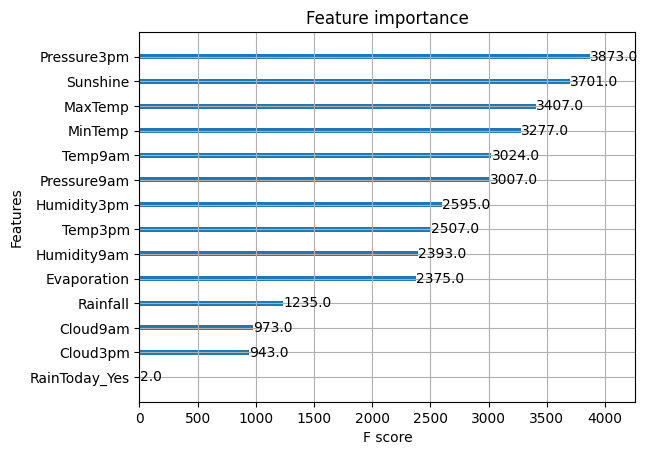

In [73]:
xgb.plot_importance(xgb_clf)

In [74]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [75]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [76]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [78]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [79]:
cvxg_clf = grid_search.best_estimator_

In [80]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.8359133126934984

In [81]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 3,
 'reg_alpha': 1,
 'subsample': 0.9}

# Questions  

### 1. Your views about the problem statement?
- The problem statement involves predicting rainfall in Sydney using machine learning models.
Given the dataset covering weather-related variables from 2008 to 2017. 
The problem statement uses various classification models, including decision trees and ensemble methods. 
These models can use features such as temperature, humidity, precipitation, and pressure to predict whether it will rain the next day.

### 2. What will be your approach to solving this task?
My approach to solving this task is : 

**(A) Data Preprocessing** 
- convert RainToday and RainTomorrow columns into dummy variable
- Replace Null values with mean of its. 
- check for outliers in this dataset there are no such outliers that affect the result.

**(B) Model Selcetion:**
- Trying various classification models, including Decision Trees and Ensemble methods
- (Random Forest, Gradient Boosting, AdaBoost, XGBoost).

**(C) Model Training and Evaluation:**
- Split the data into test and train datasets.
- Train the particular model on the training dataset.
- evaluate their performance using metrics like accuracy, ROC AUC, recall, and precision.
- Select the model with the best performance.

**(D)Model Comparison:** 
- Compare the performance of different models to select the best one

**(E)Model Optimization:**
- use hyperparameter by gridsearchcv to improve model accuracy  

### 3. What were the available ML model options you had to perform this task?
**The available ML model options include:**
- Decision Trees
- Random Forest
- Gradient Boosting
- AdaBoost
- XGBoost
- Bagging
- Grid Search
 

# 4. Which model’s performance is best and what could be the possible reason for that?
I chose several classification models and assessed their performance on the test dataset. Here are the results:


* Decision Tree
* Accuracy Score: 0.8390092879256966

* Bagging 
* Accuracy Score= 0.8297213622291022

* Random Fores
* Accuracy Score= 0.821981424148606

Grid Seach
* Accuracy Score= 0.821981424148609

Gradient Booingst
* Accuracy Score= 0.837461300305

Ada Boost
* Accuracy Score= 0.82198142410

XG Boost
* Accuracy Scoret= 0.8359133139

Decision Tree, Gradient Boosting, and XG Boosting perform the best performance with an accuracy of 0.83 on the test.

# 5. What steps can you take to improve this selected model’s performance even further?

To further enhance the performance of the selected model, I took the following steps: 

**GridSearchCV for Tree Regression, Bagging, Gradient Boosting, Random Forest, AdaBoost, XGBoost:**

- For the Bagging model, the best hyperparameter identified was 'n_estimators': 1000, which fine-tunes the ensemble of decision trees.

- For Gradient Boosting, the best hyperparameters included 'learning_rate': 0.02, 'n_estimators': 1000, and 'max_depth': 1, significantly boosting predictive accuracy.

- Random Forest was optimized with hyperparameters 'n_estimators': 1000, n_jobs=-1 ,'random_state'=42, improving its performance.

- AdaBoost's performance was enhanced by setting 'learning_rate': 0.02, and 'n_estimators': 5000 
 as the best hyperparameters.

- XGBoost achieved improved results wit'max_depth': 5, 'n_estimators':10000, 'learning_rate':0.3,'n_jobs': -1 .8 as the best hyperparameteer.

These hyperparameters have been fine-tuned to improeach model's efficiency, accuracy, and robustnessdel.
